In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAC FFCS/Possible asteroid impacts/final_orbit.csv')
df

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,(2017 CX1),Apollo Asteroid,57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21
15630,(2017 CO5),Amor Asteroid,57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04
15631,(2017 CP5),Amor Asteroid,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74
15632,(2017 CR5),Apollo Asteroid,57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95


In [21]:
df.shape

(15634, 15)

In [22]:
df.isnull().sum()


Object Name                                 0
Object Classification                       0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
dtype: int64

In [23]:
df.nunique()

Object Name                                 15634
Object Classification                           8
Epoch (TDB)                                  1833
Orbit Axis (AU)                             10927
Orbit Eccentricity                           6279
Orbit Inclination (deg)                     15169
Perihelion Argument (deg)                   15606
Node Longitude (deg)                        15596
Mean Anomoly (deg)                          15604
Perihelion Distance (AU)                     7206
Aphelion Distance (AU)                        519
Orbital Period (yr)                           600
Minimum Orbit Intersection Distance (AU)     3449
Orbital Reference                             262
Asteroid Magnitude                            477
dtype: int64

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Object Classification'] = label_encoder.fit_transform(df['Object Classification'])
df

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,0,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,0,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,0,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,0,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,(2017 CX1),4,57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21
15630,(2017 CO5),0,57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04
15631,(2017 CP5),0,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74
15632,(2017 CR5),4,57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95


In [30]:
df.drop(columns=['Object Name'], inplace=True)

In [32]:
df.head()

,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,0,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,0,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,0,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,0,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


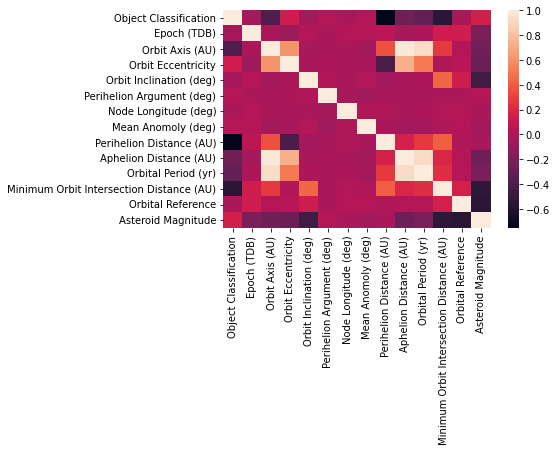

In [43]:
sns.heatmap(df.corr())


In [44]:
df.drop(columns=['Orbit Axis (AU)'], inplace=True)

In [48]:
df.drop(columns=['Orbital Period (yr)','Aphelion Distance (AU)'], inplace=True)

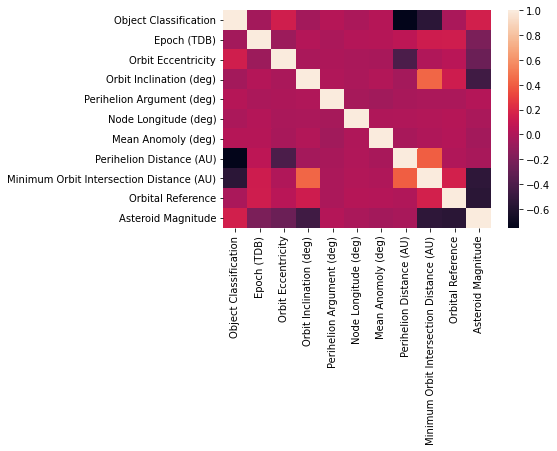

In [50]:
sns.heatmap(df.corr())

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

X = df.drop(columns='Object Classification')
y = df['Object Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()


rf.fit(X_train,y_train)
dt.fit(X_train,y_train)


y_predrf = rf.predict(X_test)
y_preddt = dt.predict(X_test)



print("accuracy Random Forest Classifier:",metrics.accuracy_score(y_test, y_predrf))
print("accuracy Decision Tree Classifier :",metrics.accuracy_score(y_test, y_preddt))


accuracy Random Forest Classifier: 0.9800387596899225
accuracy Decision Tree Classifier : 0.9852713178294573
